In [241]:

#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
from sklearn.cluster import KMeans
import numpy as np
from sklearn import datasets

In [242]:

#Reading the data and loking at the sample of the data
Data=pd.read_excel("/EastWestAirlines.xlsx")
Data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


The data contains information on passengers who belong to an airlines frequent flier program. The data contains the miles travelled and miles earned by customers in the previous year. The goal is to identify clusters of passengers tha have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

In [243]:
#converting the datatype of ID as category as it is not numeric. 
Data['Id#']=Data['ID#'].astype('category')

In [244]:
#statistics of the dataset
Data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [245]:
#dropping the unnecessary columns 
Data=Data.drop(['ID#'],axis=1)

In [246]:

#import the libraries for the k_means clustering
from sklearn.cluster import KMeans
#standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the kmeans algorithm on scaled data
Scaled_data = scaler.fit_transform(Data.iloc[:,1:])

In [247]:
#fitting various kmeans algorithms
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Scaled_data)
    #inertia on the fitting data
    wcss.append(kmeans.inertia_)

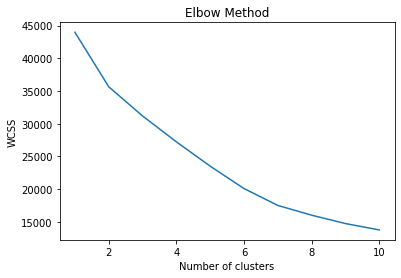

In [248]:

#plot the graph using elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Cluster 1 with n_clusters = 5

In [249]:

#kmeans using 5 clusters and fitting the scaled data into algorithm
from sklearn.cluster import KMeans
clusters = KMeans(5, random_state=27000)
clusters.fit(Scaled_data)

KMeans(n_clusters=5, random_state=27000)

 The cluster assignments are stored as a one-dimensional NumPy array in cluster.labels_.

In [250]:
clusters.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [297]:

#Assigning the cluster label with empty dataset
Data['clusters'] = clusters.labels_
Data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Id#,cluster,cluster2,cluster3,cluster4,cluster5,cluster1,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,4,1,2,2,4,4,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,4,1,2,2,4,4,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,3,4,1,2,2,4,4,2
3,14776,0,1,1,1,500,1,0,0,6952,0,4,4,1,2,2,4,4,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,5,1,0,1,1,1,1,3


In [252]:
#importing the silhouette coefficient
from sklearn.metrics import silhouette_score
score = silhouette_score(Scaled_data,predict)
print(score)#print the score

0.28295939259414205


In [253]:

# Final locations of the centroid
clusters.cluster_centers_

array([[-4.74751863e-02, -5.06270678e-01,  7.94139807e-03,
        -6.27665798e-02, -4.57538759e-01, -4.04820673e-01,
        -1.81790560e-01, -2.00283698e-01, -9.46953514e-01,
        -3.48964514e-01,  9.58411687e-01],
       [ 8.05203478e-01,  7.62368059e-02,  1.69137405e-01,
        -6.27665798e-02,  6.17745737e-01,  1.69191341e+00,
         3.67637441e+00,  3.97268531e+00,  2.44040909e-01,
         9.08824171e-01, -2.00179878e-01],
       [-5.53134234e-02, -4.99855295e-01,  4.26575241e-02,
        -5.88201072e-02, -4.58041592e-01, -3.69720606e-01,
        -1.63253994e-01, -1.75286995e-01,  7.80918411e-01,
        -2.54793856e-01, -8.00281223e-01],
       [ 2.32870378e-02,  1.39281488e+00, -9.14885384e-02,
        -5.25521801e-02,  1.14998714e+00,  8.14344719e-01,
        -6.88766388e-02, -7.03756086e-02,  3.94278590e-01,
         7.19624041e-01, -3.92435780e-01],
       [-8.44329231e-02,  1.02208440e+00, -9.82418871e-02,
         1.56462993e+01,  3.17969131e+00,  1.71461374e+00,
  

In [298]:
#mean of the rows
Data.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster2,cluster3,cluster4,cluster5,cluster1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,42247.644024,107.389288,1.363815,1.015676,1.000000,6109.518615,7.729589,205.216199,0.612671,2162.335075,0.201829,0.102547,0.988896,1.968648,0.009144,0.102547,0.102547
1,1,172647.664474,766.993421,2.164474,1.039474,1.000000,32062.138158,27.848684,5607.105263,16.440789,4622.473684,0.809211,2.177632,0.118421,0.000000,3.000000,2.177632,2.177632
2,2,64137.813559,101.325886,1.369800,1.020801,1.000770,6073.574730,8.047766,231.879815,0.710324,5728.459168,0.247304,3.993837,0.855932,1.819723,1.997689,3.993837,3.993837
3,3,117733.118644,162.128614,3.977069,1.000997,1.001994,44907.980060,19.403789,363.626122,1.106680,4937.407777,0.717846,1.073779,0.007976,0.994018,0.997009,1.073779,1.073779
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,6.000000,0.066667,1.000000,1.000000,6.000000,6.000000


In [301]:
#importing plotly.express to plot the figures
import plotly.express as px
frame=pd.DataFrame(Data)
fig = px.bar(frame,x='clusters',y='Bonus_miles')
fig.show()

In [303]:
#creating a new column into the dataset and saving the cluster1
Data['cluster1']=frame.clusters

# Cluster 2 with n_clusters = 2

In [304]:

# defining the kmeans function using 2 clusters with initialization as k-means++
kmeans=KMeans(n_clusters = 2,init='k-means++')
#fitting the scaled data into the k-means algorithm
kmeans.fit(Scaled_data)
predict=kmeans.predict(Scaled_data)
#predicting the data using silhouette library 
score = silhouette_score(Scaled_data,predict)
print(score)#print the score

0.2988284231204285


In [305]:
frame=pd.DataFrame(Data)
frame['clusters']=predict
frame['clusters'].value_counts()

1    2652
0    1347
Name: clusters, dtype: int64

In [306]:

#plotting the bar graph
fig=px.bar(frame,x='clusters',y='Bonus_trans')
fig.show()

In [308]:
Data['cluster2']=frame.clusters

#Cluster 3 with n_clusters = 3

In [309]:

# defining the kmeans function using 2 clusters with initialization as k-means++
kmeans=KMeans(n_clusters = 3,init='k-means++')
kmeans.fit(Scaled_data)
predict=kmeans.predict(Scaled_data)
print('Kmeans: {}'.format(silhouette_score(Scaled_data,predict)))

Kmeans: 0.28921334812745486


In [311]:
frame=pd.DataFrame(Data)
frame['clusters']=predict
frame['clusters'].value_counts()

1    2555
0    1278
2     166
Name: clusters, dtype: int64

In [313]:

fig=px.bar(frame,x='clusters',y='Balance')
fig.show()

In [314]:
Data['cluster3']=frame.clusters

#Cluster 4 with n_clusters = 4

In [315]:

#defining the kmeans function using 4 clusters with initialization as k-means++
kmeans=KMeans(n_clusters = 4,init='k-means++')
kmeans.fit(Scaled_data)
predict=kmeans.predict(Scaled_data)
print('Kmeans: {}'.format(silhouette_score(Scaled_data,predict)))

Kmeans: 0.2503860372115432


In [317]:
frame=pd.DataFrame(Data)
frame['clusters']=predict
frame['clusters'].value_counts()

2    1532
0    1301
1    1014
3     152
Name: clusters, dtype: int64

In [318]:

fig=px.bar(frame,x='clusters',y='Bonus_miles')
fig.show()

In [319]:
Data['cluster4']=frame.clusters

#Cluster 5 with n_clusters = 7

In [320]:

#defining the kmeans function using 7 clusters with initialization as k-means++
kmeans=KMeans(n_clusters = 7,init='k-means++')
kmeans.fit(Scaled_data)
predict=kmeans.predict(Scaled_data)
print('Kmeans: {}'.format(silhouette_score(Scaled_data,predict)))

Kmeans: 0.2829431106370869


In [321]:
frame=pd.DataFrame(Data)
frame['clusters']=predict
frame['clusters'].value_counts()

2    1492
0    1272
6     983
1     137
4      57
5      43
3      15
Name: clusters, dtype: int64

In [323]:

fig=px.bar(frame,x='clusters',y='Bonus_trans')
fig.show()

In [324]:
Data['cluster5']=frame.clusters

In [325]:

#Re-arranging the columns in the dataset
columns = list(Data.columns)
df = Data[columns[12:18]+columns[0:12]]
print(df)

      cluster  cluster2  cluster3  cluster4  cluster5  cluster1  Balance  \
0           0         1         1         0         0         2    28143   
1           0         1         1         0         0         2    19244   
2           0         1         1         0         0         2    41354   
3           0         1         1         0         0         2    14776   
4           1         0         0         1         6         3    97752   
...       ...       ...       ...       ...       ...       ...      ...   
3994        2         1         1         2         2         0    18476   
3995        2         1         1         2         2         0    64385   
3996        2         1         1         2         2         0    73597   
3997        2         1         1         2         2         0    54899   
3998        2         1         1         2         2         0     3016   

      Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  \
0       

In [291]:
#Sampling the 5 rows in the dataset 
df.sample(5)

,cluster,cluster2,cluster3,cluster4,cluster5,cluster1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Id#
3287,0,1,2,0,0,0,27071,0,1,1,1,2125,10,0,0,2059,0,3310
3399,0,1,2,0,0,0,54039,0,1,1,1,5250,22,1250,10,1709,1,3422
1136,4,0,1,2,4,4,24418,0,2,1,1,12533,13,0,0,5626,1,1148
2441,1,0,1,1,1,1,83811,0,4,1,1,25936,15,500,1,3281,1,2460
2887,0,1,2,0,0,0,109505,0,3,1,1,15766,23,0,0,1867,0,2909


# Grouping the data by Cluster 1 and finding the average of the features 

In [337]:

df.iloc[:,5:].groupby(df.cluster1).mean()

,cluster1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster1,,,,,,,,,,,,
0,0.0,42247.644024,107.389288,1.363815,1.015676,1.000000,6109.518615,7.729589,205.216199,0.612671,2162.335075,0.201829
1,1.0,172647.664474,766.993421,2.164474,1.039474,1.000000,32062.138158,27.848684,5607.105263,16.440789,4622.473684,0.809211
2,2.0,64137.813559,101.325886,1.369800,1.020801,1.000770,6073.574730,8.047766,231.879815,0.710324,5728.459168,0.247304
3,3.0,117733.118644,162.128614,3.977069,1.000997,1.001994,44907.980060,19.403789,363.626122,1.106680,4937.407777,0.717846
4,4.0,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


cluster1
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

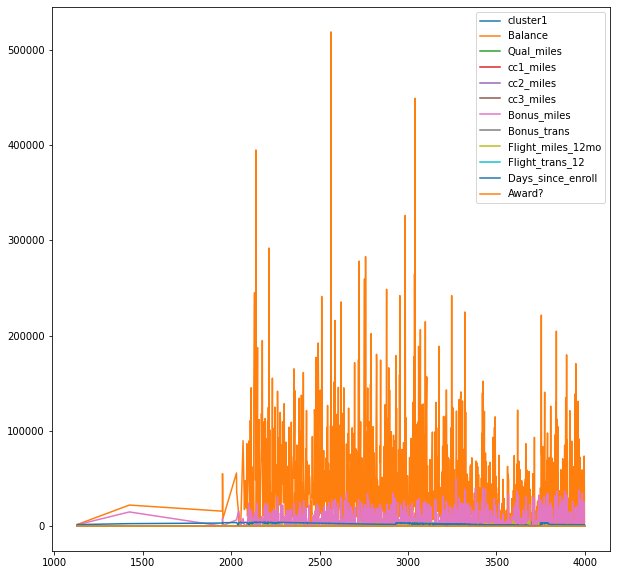

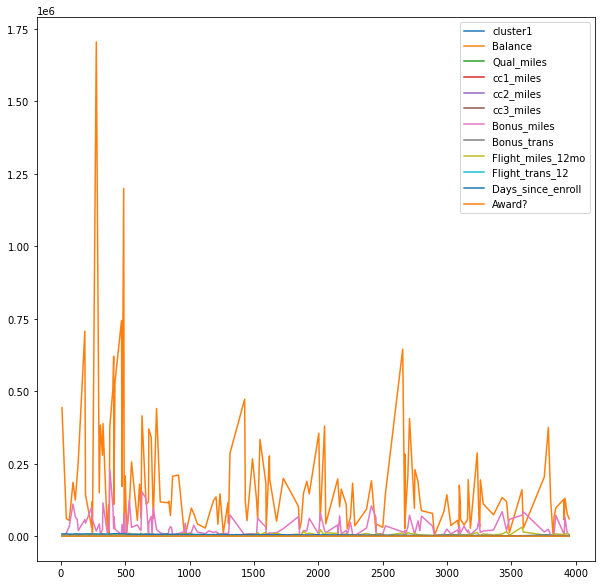

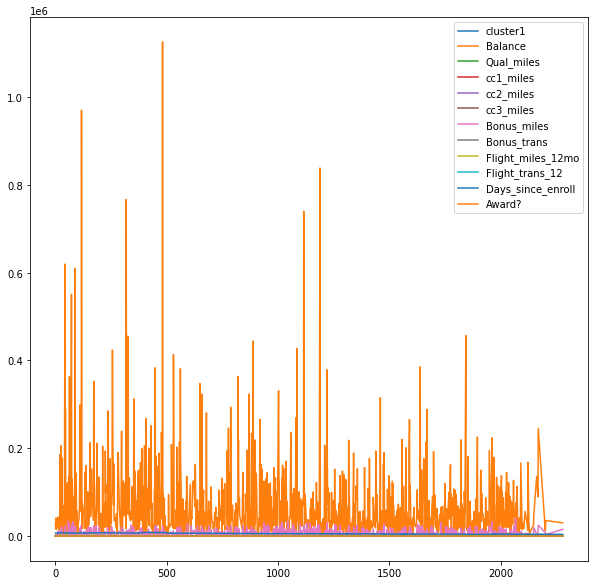

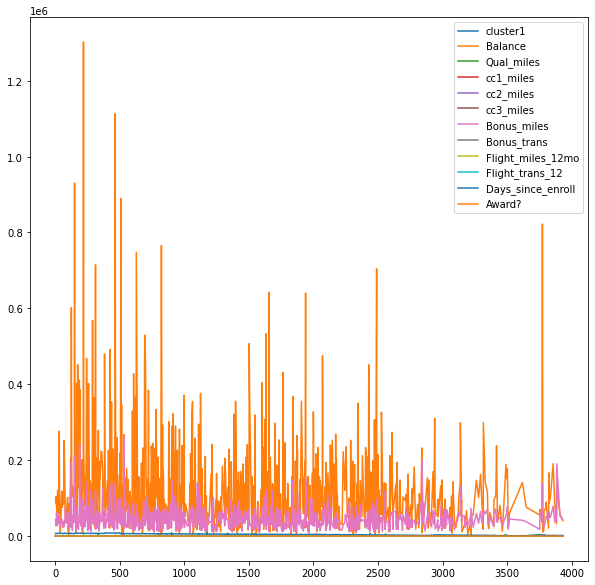

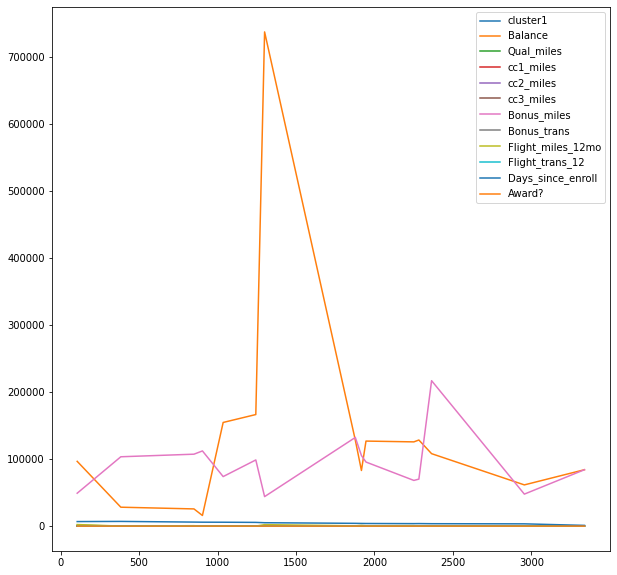

In [341]:

df.iloc[:,5:].groupby(df.cluster1).plot(figsize=(10,10))

# Grouping the data by Cluster 2 and finding the average of the features

In [329]:

df.iloc[:,5:].groupby(df.cluster2).mean()

,cluster1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster2,,,,,,,,,,,,
0,2.634744,124824.664439,251.333333,3.547142,1.011878,1.033408,40214.404603,20.102450,941.447661,2.814402,5144.193022,0.699332
1,0.855204,47584.044495,89.656109,1.303922,1.015837,1.001508,5427.389517,7.284314,215.547888,0.641780,3597.621041,0.203243


cluster2
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

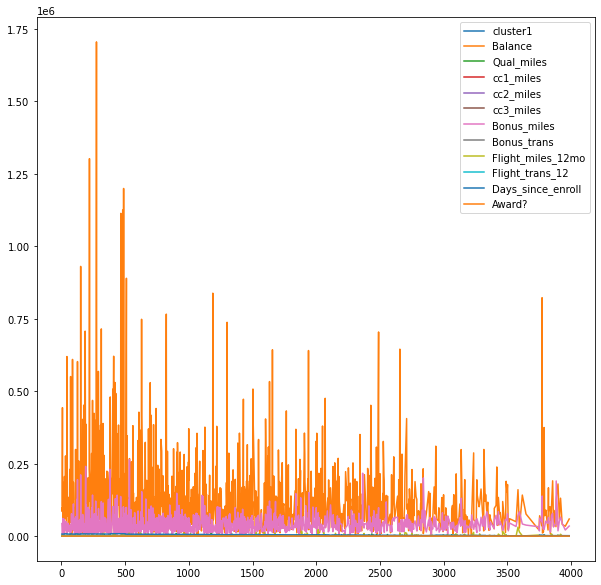

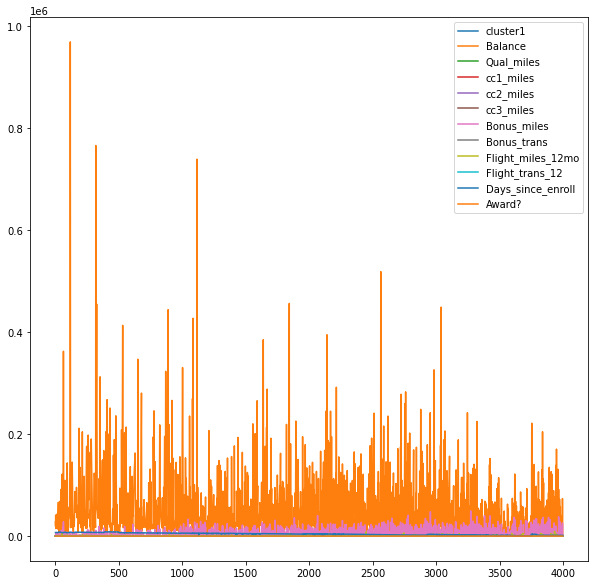

In [330]:

df.iloc[:,5:].groupby(df.cluster2).plot(figsize=(10,10))

# Grouping the data by Cluster 3 and finding the average of the features

In [331]:

df.iloc[:,5:].groupby(df.cluster3).mean()

,cluster1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster3,,,,,,,,,,,,
0,2.737872,114663.696401,165.932707,3.679969,1.002347,1.037559,39699.281690,18.787950,332.758998,1.012520,5088.611111,0.643975
1,0.836791,46966.532290,94.839139,1.241096,1.019178,1.000391,4946.834442,7.000391,201.787867,0.618004,3600.850881,0.205479
2,1.084337,167421.777108,734.566265,2.180723,1.036145,1.000000,31249.373494,27.102410,5415.234940,15.783133,4618.674699,0.801205


cluster3
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

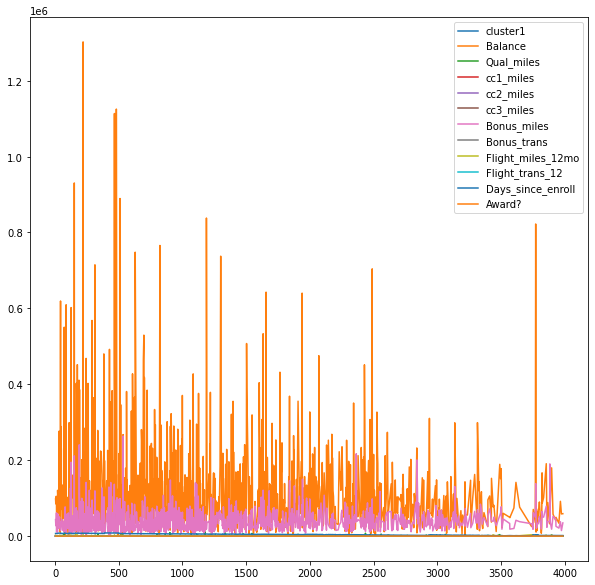

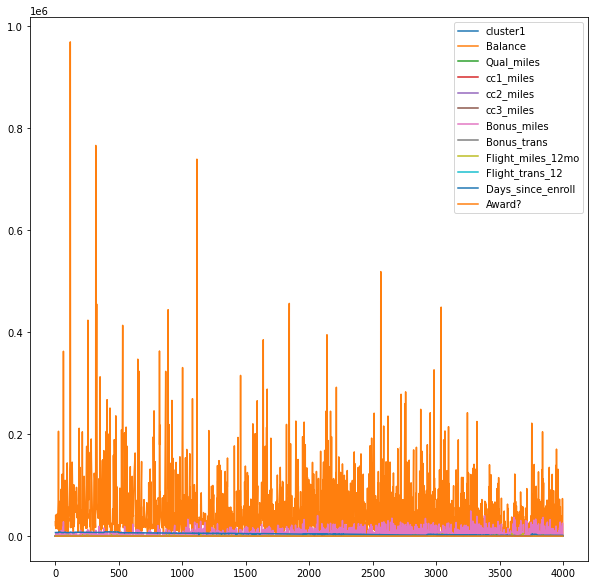

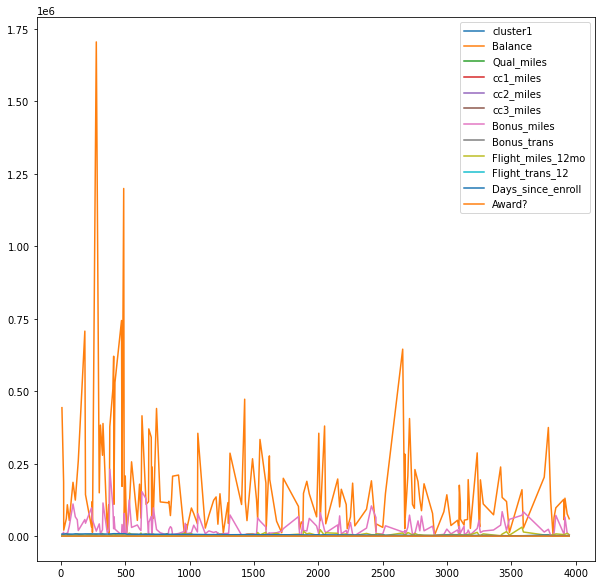

In [332]:

df.iloc[:,5:].groupby(df.cluster3).plot(figsize=(10,10))

# Grouping the data by Cluster 4 and finding the average of the features

In [333]:

df.iloc[:,5:].groupby(df.cluster4).mean()

,cluster1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster4,,,,,,,,,,,,
0,1.994620,63960.518832,109.060723,1.370484,1.018447,1.000769,6067.031514,8.024596,231.565719,0.708686,5724.685626,0.246733
1,3.013807,118651.291913,161.535503,3.970414,1.001972,1.047337,45710.412229,19.565089,367.238659,1.118343,4943.770217,0.714990
2,0.009138,42143.746084,100.552219,1.369452,1.016971,1.000000,6165.293081,7.757180,204.853786,0.612272,2158.422977,0.203655
3,1.000000,172647.664474,766.993421,2.164474,1.039474,1.000000,32062.138158,27.848684,5607.105263,16.440789,4622.473684,0.809211


cluster4
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

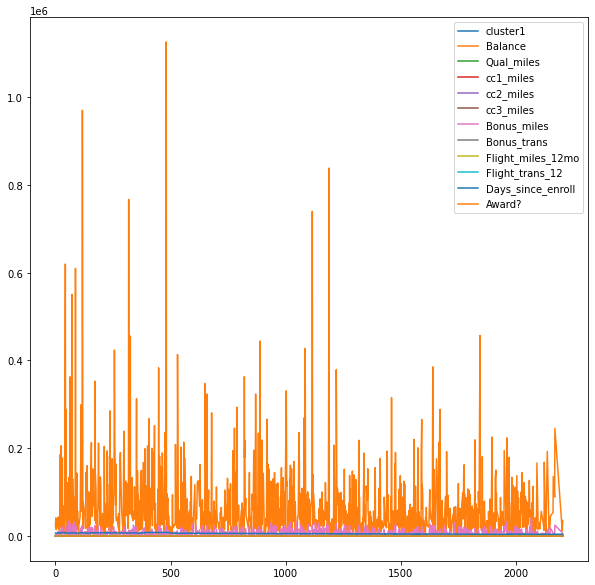

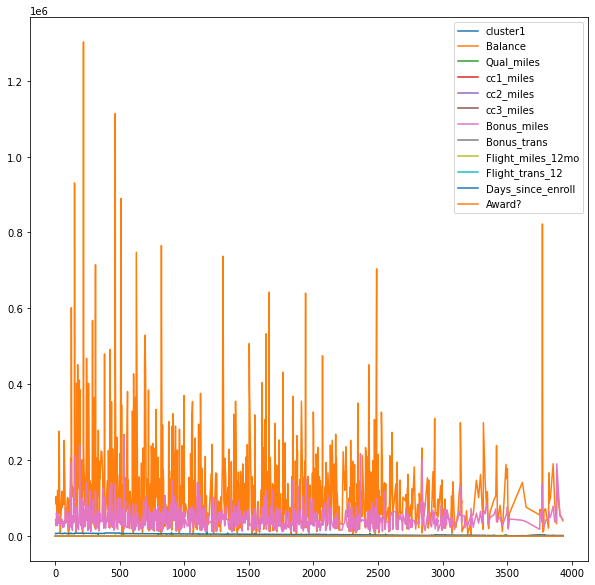

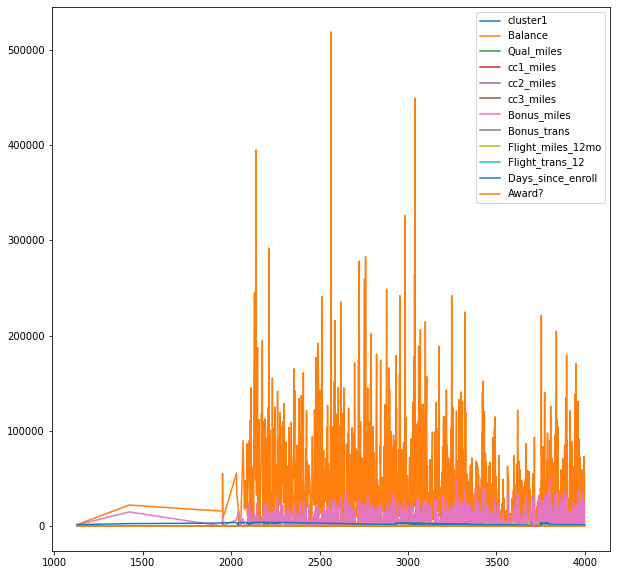

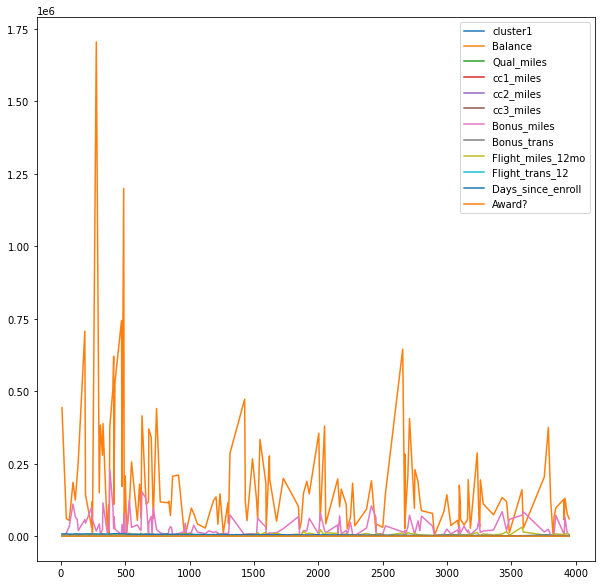

In [334]:

df.iloc[:,5:].groupby(df.cluster4).plot(figsize=(10,10))

# Grouping the data by Cluster 5 and finding the average of the features

In [335]:

df.iloc[:,5:].groupby(df.cluster5).mean()

,cluster1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster5,,,,,,,,,,,,
0,1.992925,63974.613208,57.952044,1.373428,1.000000,1.000786,5959.226415,7.908019,229.950472,0.706761,5726.112421,0.245283
1,1.000000,168113.372263,442.277372,2.226277,1.000000,1.000000,32780.948905,28.386861,5841.664234,16.934307,4618.087591,0.788321
2,0.006032,41955.001340,41.266086,1.374665,1.000000,1.000000,6083.471850,7.653485,200.782172,0.603217,2157.406166,0.199732
3,4.000000,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,1.491228,114235.403509,5537.491228,2.070175,1.000000,1.000000,19622.228070,12.526316,965.473684,2.824561,3890.157895,0.543860
5,1.046512,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,2.996948,117785.935910,63.701933,3.981689,1.000000,1.002035,45020.880977,19.471007,365.926755,1.112920,4957.644964,0.719227


cluster5
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

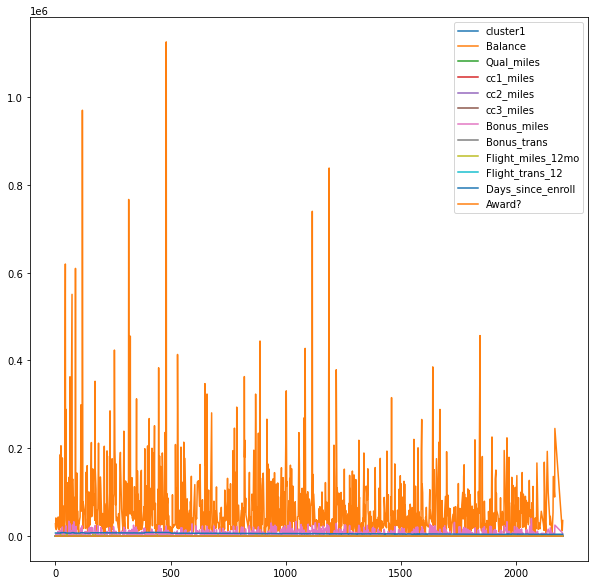

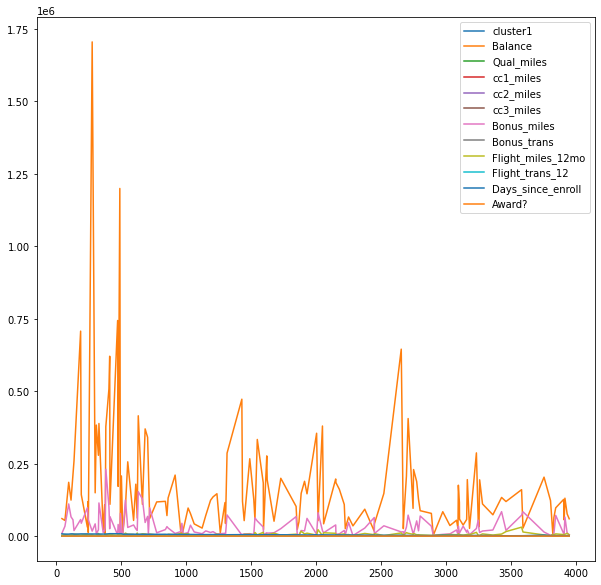

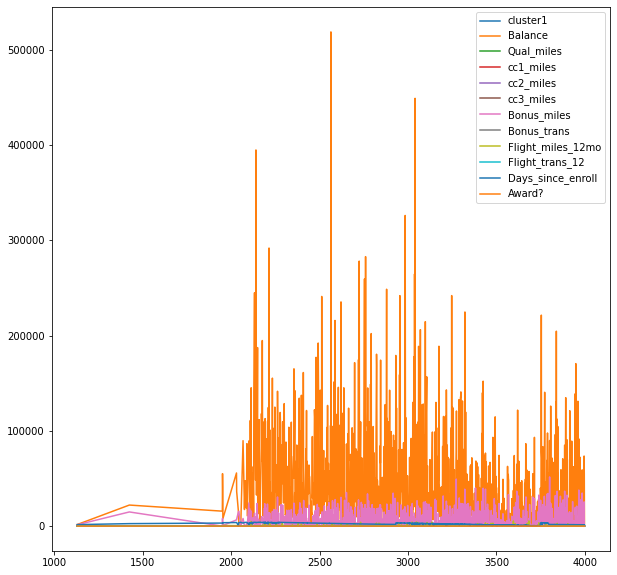

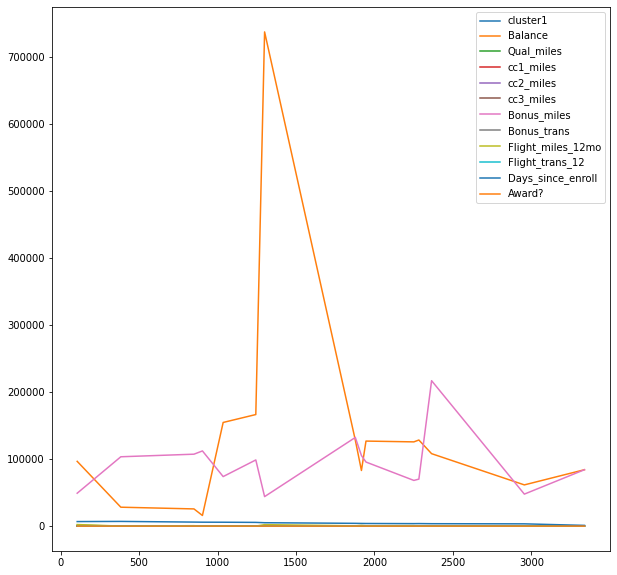

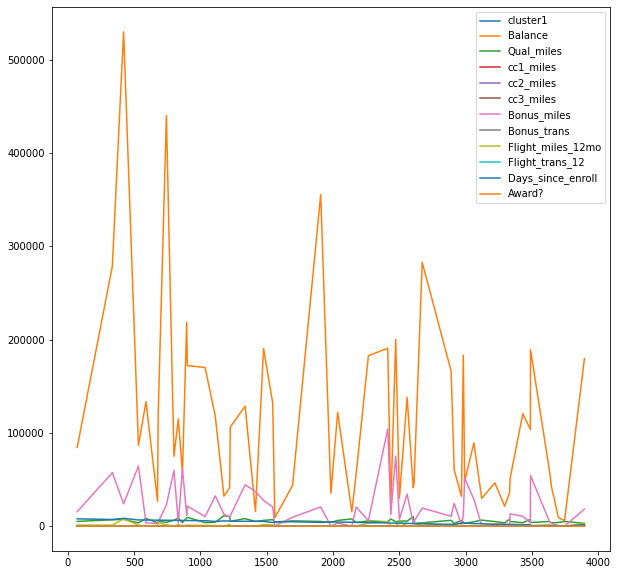

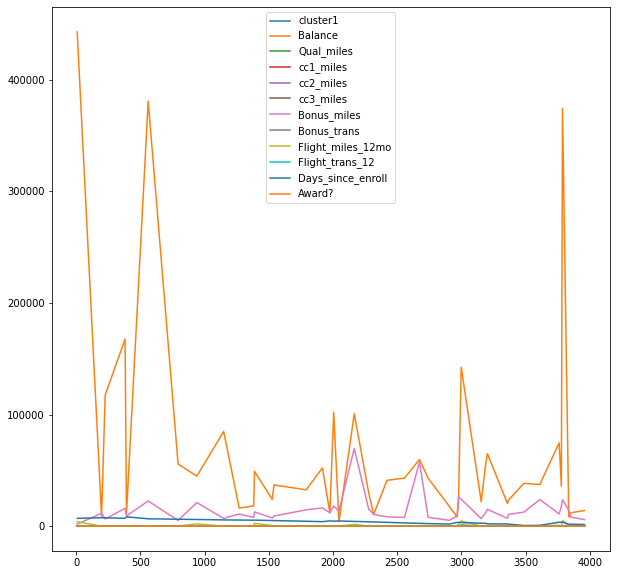

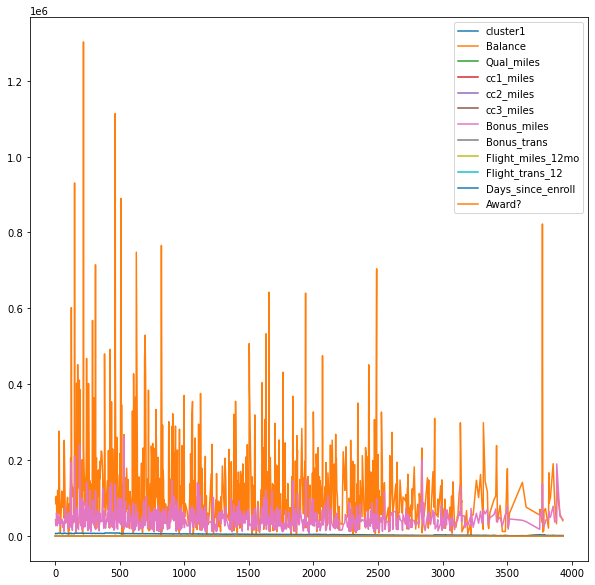

In [336]:

df.iloc[:,5:].groupby(df.cluster5).plot(figsize=(10,10))